TP 1

In [92]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# plt.rcParams['figure.facecolor'] = 'white'
# plt.rcParams['axes.facecolor'] = 'white'
%matplotlib inline

#### Algoritmo de pasaje a coordenadas cromáticas

In [36]:
def chromatic_coord_transform(image: np.array) -> np.array:
    # Get divider 
    rgb_divider = np.sum(image, axis=2)
    # Expand array
    rgb_divider = rgb_divider[:,:,np.newaxis]
    return np.divide(image, rgb_divider, where=rgb_divider != 0)
    
    

In [96]:
# Load images
image_lst = list()
image_lst.append(cv.imread('coord_cromatica/CoordCrom_1.png'))
image_lst.append(cv.imread('coord_cromatica/CoordCrom_2.png'))
image_lst.append(cv.imread('coord_cromatica/CoordCrom_3.png'))

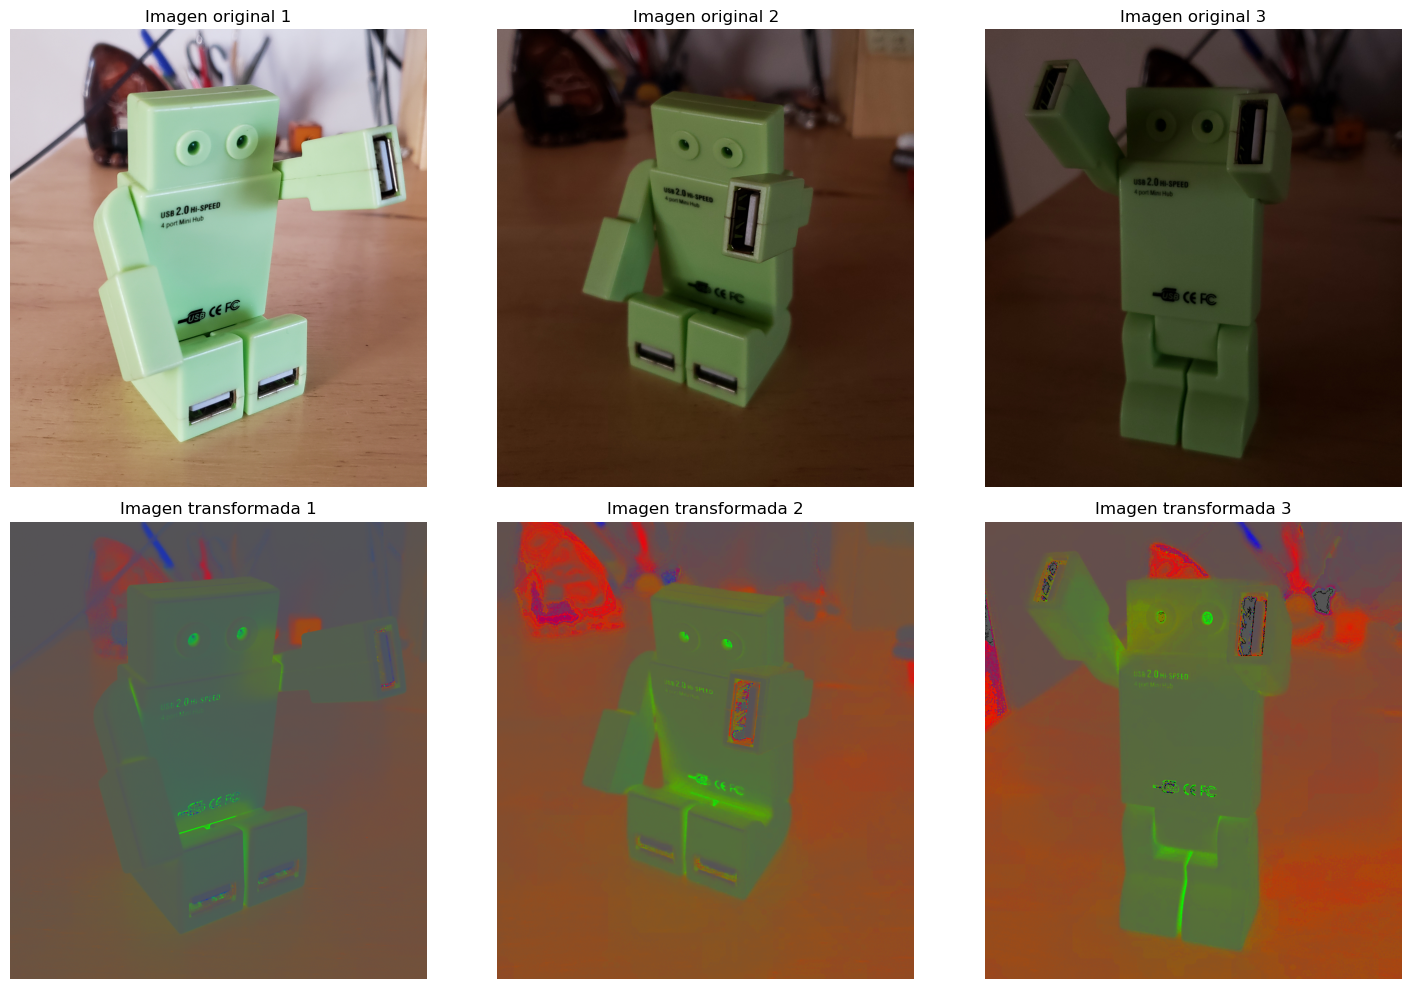

In [97]:
fig, axs = plt.subplots(2, 3, figsize=(15,10))

for index, image in enumerate(image_lst):
    axs[0, index].set_title('Imagen original '+ str(index+1))
    axs[0, index].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    axs[0, index].axis('off')
    imageChromatic = chromatic_coord_transform(image)
    axs[1, index].set_title('Imagen transformada '+ str(index+1))
    axs[1, index].imshow(imageChromatic[:,:,::-1])
    axs[1, index].axis('off')


plt.tight_layout()
plt.show()

#### Algoritmo White Patch

In [144]:
def white_patch_transform(image: np.array, percentile=95):
    # Get RGB max value
    use_percentile = False
    rgb_max = np.max(image, axis=(0,1))
    if np.any(rgb_max == 255):
        rgb_max = np.percentile(image, percentile, axis=(0,1))
        use_percentile = True
    result_image = (255.0/rgb_max) * image
    return result_image.astype(np.uint8), use_percentile

In [145]:
# Load images
image_test_lst = list()
image_test_lst.append(cv.imread('white_patch/test_red.png'))
image_test_lst.append(cv.imread('white_patch/test_green.png'))
image_test_lst.append(cv.imread('white_patch/test_blue.png'))


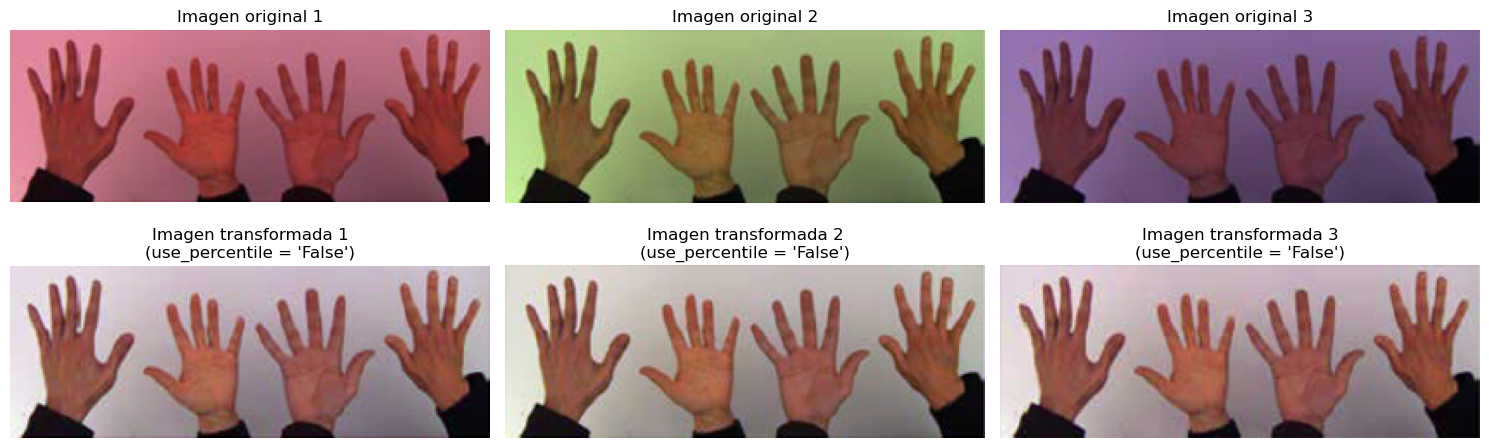

In [146]:
fig, axs = plt.subplots(2, 3, figsize=(15,5))

for index, image in enumerate(image_test_lst):
    axs[0, index].set_title('Imagen original '+ str(index+1))
    axs[0, index].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    axs[0, index].axis('off')
    imageChromatic, use_percentile = white_patch_transform(image)
    axs[1, index].set_title('Imagen transformada '+ str(index+1) + "\n(use_percentile = '" + str(use_percentile) + "')")
    axs[1, index].imshow(imageChromatic[:,:,::-1])
    axs[1, index].axis('off')


plt.tight_layout()
plt.show()

In [147]:
image_wp_lst = list()
image_wp_lst.append(cv.imread('white_patch/wp_red.png'))
# image_wp_lst.append(cv.imread('white_patch/wp_red2.jpg'))
image_wp_lst.append(cv.imread('white_patch/wp_blue.jpg'))
image_wp_lst.append(cv.imread('white_patch/wp_green.png'))
# image_wp_lst.append(cv.imread('white_patch/wp_green2.jpg'))

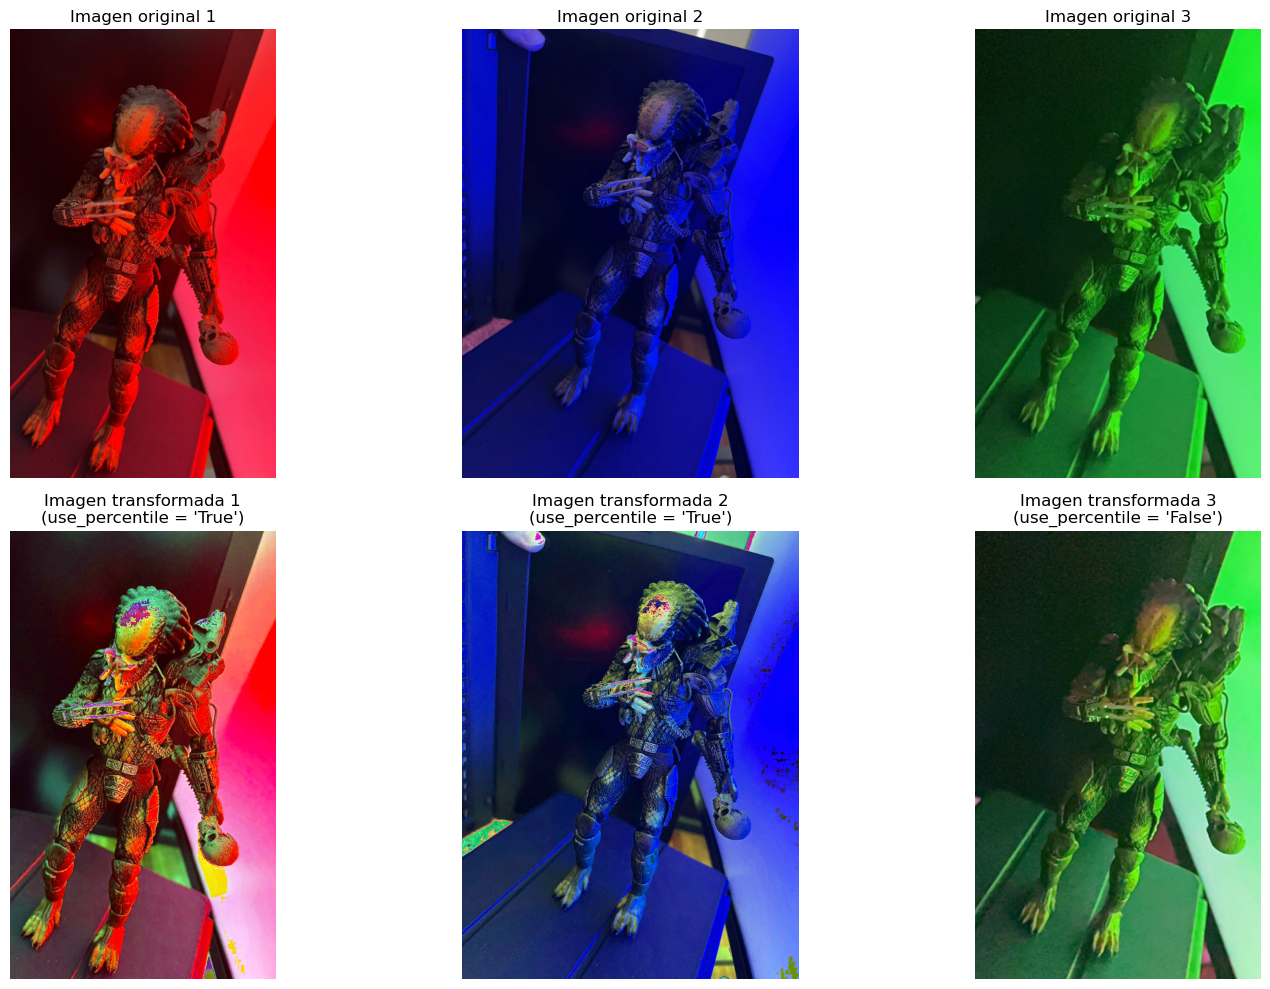

In [148]:
fig, axs = plt.subplots(2, len(image_wp_lst), figsize=(16,10))

for index, image in enumerate(image_wp_lst):
    axs[0, index].set_title('Imagen original '+ str(index+1))
    axs[0, index].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    axs[0, index].axis('off')
    imageChromatic, use_percentile = white_patch_transform(image, percentile=99)
    axs[1, index].set_title('Imagen transformada '+ str(index+1) + "\n(use_percentile = '" + str(use_percentile) + "')")
    axs[1, index].imshow(imageChromatic[:,:,::-1])
    axs[1, index].axis('off')


plt.tight_layout()
plt.show()

In [142]:
image_wp_lst_2 = list()
image_wp_lst_2.append(cv.imread('white_patch/wp_red2.jpg'))
# image_wp_lst_2.append(cv.imread('white_patch/wp_blue.jpg'))
# image_wp_lst_2.append(cv.imread('white_patch/wp_green2.png'))
image_wp_lst_2.append(cv.imread('white_patch/wp_green2.jpg'))

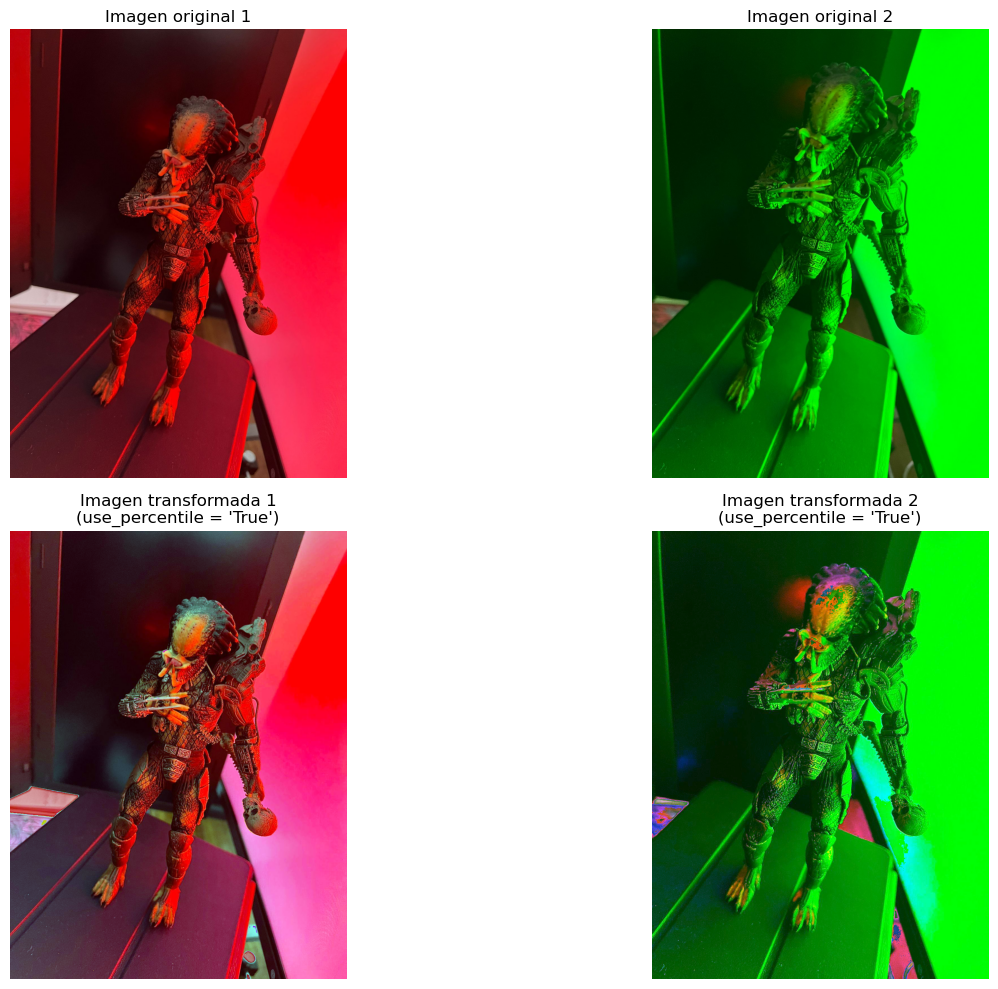

In [143]:
fig, axs = plt.subplots(2, len(image_wp_lst_2), figsize=(16,10))

for index, image in enumerate(image_wp_lst_2):
    axs[0, index].set_title('Imagen original '+ str(index+1))
    axs[0, index].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    axs[0, index].axis('off')
    imageChromatic, use_percentile = white_patch_transform(image, percentile=99)
    axs[1, index].set_title('Imagen transformada '+ str(index+1) + "\n(use_percentile = '" + str(use_percentile) + "')")
    axs[1, index].imshow(imageChromatic[:,:,::-1])
    axs[1, index].axis('off')


plt.tight_layout()
plt.show()

##### Veamos el efecto del cambio de percentil en los casos en donde no podemos utilizar el maximo valor de RGB.

In [141]:
def show_wp_image(percentile):
    # print(percentile)
    image, use_percentile = white_patch_transform(image_wp_lst[1], percentile=percentile)
    plt.imshow(image[:,:,::-1])
    # plt.figure(figsize=(10,5))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

threshold_slider = widgets.IntSlider(value=90, min=1, max=100, step=1, description='Percentile')    

widgets.interact(show_wp_image, percentile=threshold_slider)    


interactive(children=(IntSlider(value=90, description='Percentile', min=1), Output()), _dom_classes=('widget-i…

<function __main__.show_wp_image(percentile)>

In [128]:
imageXYZ = cv.cvtColor(image, cv.COLOR_BGR2XYZ)
imageRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)

In [ ]:


cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
imageCoord = np.zeros(imageRGB.shape)
for i in range(imageRGB.shape[0]):
    for j in range(imageRGB.shape[1]):
        XYZ = np.sum(imageRGB[i,j,:])
        imageCoord[i,j,:] = imageRGB[i,j,:]/XYZ if XYZ != 0 else 0       
imageCoord = imageCoord

In [ ]:
rgbSum = np.sum(imageRGB, axis=2)
print(rgbSum[rgbSum == 0])
rgbSum = rgbSum[:,:,np.newaxis]
# imageCoordFast = np.where(rgbSum == 0, 0, np.divide(imageRGB, rgbSum, where=rgbSum != 0))
imageCoordFast = np.divide(imageRGB, rgbSum, where=rgbSum != 0)

print(imageCoordFast[imageCoordFast == 0])


In [ ]:
cv.imshow('image', imageCoordFast)
cv.waitKey(0)
cv.destroyAllWindows()